In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Sampling frequency
fs = 1500  # Hz
nyq = 0.5 * fs

def rectify(data):
    rec = abs(data)
    return rec

def lowpass_filter(data, cutoff_l, fs, order):
    lp_cutoff = cutoff_l/nyq
    n, d = butter(order, lp_cutoff, btype='low', analog=False)
    filtered = filtfilt(n, d, data)
    return filtered

# for 4 sets in each muscle of each subject:
find the approximate range of the dynamic part of the dataset;
mark the start of each burst;
set a threshold and mark the point when the wave meets the threshold

In [ ]:
""""
AAset = {}
lowest_positions = []

for i in range(4):  # 4 is the number of sets
    AAset[str(i)] = pd.read_csv(r"C:\Users\86159\Downloads\all data sets\AAA clean version data\AAset0" + str(i+1) + ".csv")
    end_index = int(len(AAset[str(i)]) / 2)
    raw_bb = AAset[str(i)].values[0:end_index + 1000, 2]  # just crudely chopped the data in half to get the burst data.
    time = np.arange(len(raw_bb)) / fs
    recfied_bb = rectify(raw_bb)
    smoothed_bb = lowpass_filter(recfied_bb, 2, fs, 4)

    if i == 0:
        plt.figure()

        plt.plot(time, smoothed_bb, label='BB (low pass filtered)')
        plt.xlim([0, max(time)])
        plt.title("LOW PASS FILTER for set " + str(i + 1), loc='left', color='#787d80', size=16)
        plt.legend()
        plt.xticks(range(int(min(time)), int(max(time)) + 1, 1))

        ranges = [(0, 1), (1, 2), (3, 4), (5, 6), (7, 8), (9, 10), (11, 12), (13, 14), (15, 16), (17, 18), (19, 20), (21, 22),
                  (23, 24), (25, 26), (27, 28), (29, 30)]
        for range_idx, (start, end) in enumerate(ranges):
            # Find the indices where time is within the desired range
            indices = np.where((time > start) & (time < end))[0]
            # Check if any indices were found
            if indices.size > 0:
                # Extract the relevant values from smoothed_bb using the indices
                bb_range = smoothed_bb[indices]
                # Find the index of the lowest point within the range
                lowest_index = np.argmin(bb_range)
                # Calculate the corresponding time and value
                lowest_time = time[indices][lowest_index]
                lowest_value = bb_range[lowest_index]
                # Store the lowest position
                lowest_positions.append((range_idx, lowest_time, lowest_value))
        
        # Mark the lowest points on the curve
        for range_idx, lowest_time, lowest_value in lowest_positions:
            plt.scatter(lowest_time, lowest_value, color='red', label=f'Lowest Point (Range {range_idx + 1})')

            lowest_values = [lowest_value for _, _, lowest_value in lowest_positions]
            max_lowest_value = max(lowest_values)
            plt.axhline(y=max_lowest_value, color="#00ff00", linewidth=1.2, linestyle="--")
    
        # Find the crossing point
        crossing_points = np.where(np.diff(np.sign(smoothed_bb - max_lowest_value)))[0]
        crossing_position = fs*time[crossing_points]
        crossing_time = time[crossing_points]
        
        for piece in crossing_time:
            print(piece)
            
        print(f"Data point")
  
        for element in crossing_position:
            print(round(element, 0))
            
        plt.scatter(crossing_time, np.full_like(crossing_time, max_lowest_value), color='orange')
            
plt.show()

""""

# for one set of BB:

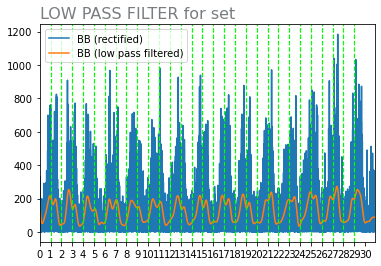

In [8]:
BB = {}
lowest_positions = []

BB = pd.read_csv(r"data\BB.csv")

end_index = int(len(BB) / 2)
BB = BB.values[0:end_index + 1000, 0]  # just crudely chopped the data in half to get the burst data.
time = np.arange(len(BB)) / fs
BB_rec = rectify(BB)
BB_lpf = lowpass_filter(BB_rec, 2, fs, 4)

plt.figure()
plt.plot(time, BB_rec, label='BB (rectified)')
plt.plot(time, BB_lpf, label='BB (low pass filtered)')
plt.xlim([0, max(time)])
plt.title("LOW PASS FILTER for set ", loc='left', color='#787d80', size=16)
plt.legend()
plt.xticks(range(int(min(time)), int(max(time)) + 1, 1))

for x in range(1, 30):
    plt.axvline(x=x, color="#00ff00", linewidth=1.2, linestyle="--")


plt.show()

0.16866666666666666
0.31866666666666665
1.7586666666666666
2.29
3.533333333333333
4.01
5.381333333333333
6.028
7.462
7.994
9.508666666666667
9.691333333333333
11.498666666666667
11.912666666666667
13.623333333333333
14.05
15.676666666666666
15.940666666666667
16.230666666666668
16.260666666666665
17.796
18.126666666666665
19.648
20.4
21.708666666666666
22.218
23.801333333333332
24.094
25.792666666666666
26.018
27.998666666666665
27.999333333333333
28.208
29.934
30.126666666666665
Data point:
253.0
478.0
2638.0
3435.0
5300.0
6015.0
8072.0
9042.0
11193.0
11991.0
14263.0
14537.0
17248.0
17869.0
20435.0
21075.0
23515.0
23911.0
24346.0
24391.0
26694.0
27190.0
29472.0
30600.0
32563.0
33327.0
35702.0
36141.0
38689.0
39027.0
41998.0
41999.0
42312.0
44901.0
45190.0


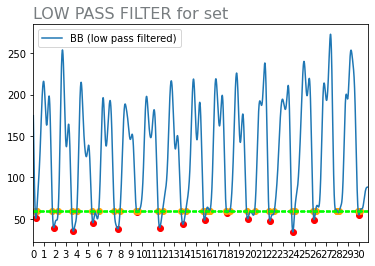

In [9]:
plt.figure()
plt.plot(time, BB_lpf, label='BB (low pass filtered)')
plt.xlim([0, max(time)])
plt.title("LOW PASS FILTER for set ", loc='left', color='#787d80', size=16)
plt.legend()
plt.xticks(range(int(min(time)), int(max(time)) + 1, 1))
    
ranges = [(0, 1), (1, 2), (3, 4), (5, 6), (7, 8), (9, 10), (11, 12), (13, 14), (15, 16), (17, 18), (19, 20), (21, 22),
                  (23, 24), (25, 26), (27, 28), (29, 30)]
    
for range_idx, (start, end) in enumerate(ranges):
    # Find the indices where time is within the desired range
    indices = np.where((time > start) & (time < end))[0]
        # Check if any indices were found
    if indices.size > 0:
        # Extract the relevant values from BB_lpf using the indices
        bb_range = BB_lpf[indices]
        # Find the index of the lowest point within the range
        lowest_index = np.argmin(bb_range)
        # Calculate the corresponding time and value
        lowest_time = time[indices][lowest_index]
        lowest_value = bb_range[lowest_index]
        # Store the lowest position
        lowest_positions.append((range_idx, lowest_time, lowest_value))
        
# Mark the lowest points on the curve
for range_idx, lowest_time, lowest_value in lowest_positions:
    plt.scatter(lowest_time, lowest_value, color='red', label=f'Lowest Point (Range {range_idx + 1})')

    lowest_values = [lowest_value for _, _, lowest_value in lowest_positions]
    max_lowest_value = max(lowest_values)
    plt.axhline(y=max_lowest_value, color="#00ff00", linewidth=1.2, linestyle="--")
    
# Find the crossing point
crossing_points = np.where(np.diff(np.sign(BB_lpf - max_lowest_value)))[0]
crossing_position = fs*time[crossing_points]
crossing_time = time[crossing_points]
        
for piece in crossing_time:
    print(piece)
            
print(f"Data point:")
  
for element in crossing_position:
    print(round(element, 0))
            
plt.scatter(crossing_time, np.full_like(crossing_time, max_lowest_value), color='orange')
            
plt.show()
